In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
from urllib.request import urlopen

In [2]:
page = requests.get('https://www.newegg.com/core-i9-9th-gen-intel-core-i9-9900kf/p/N82E16819117992')
soup = BeautifulSoup(page.content, 'html.parser')

In [3]:
comments = soup.find_all('div',{'class':'comments-content'})
len(comments)

8

In [4]:
pros = []
cons = []
overall = []

In [5]:
for c in comments:
    if len(c.find_all('p')) == 3:
        pros.append(c.find_all('p')[0].text)
        cons.append(c.find_all('p')[1].text)
        overall.append(c.find_all('p')[2].text)
print(f'pros:\n{pros}\ncons:\n{cons}\noverall:\n{overall}')

pros:
['\nPros:\r\n                Works like expected\r\n            ', '\nPros:\r\n                -Arguably the fastest all-around CPU you can get at the moment-Plenty of cores-Mine has hit 5ghz, stable-KF variant is unlocked and slightly discounted vs the regular 9900k (just no iGPU, which could be a benefit in the long run)\r\n            ', '\nPros:\r\n                Hit an easy 5.1 ghz overclockGood price for the umph\r\n            ', '\nPros:\r\n                So far so good. pared with M.2 ssd and traditional ssd. working flawlessly.\r\n            ', "\nPros:\r\n                OC'd this chip to 4.5Ghz with stock voltage. Idles at 27 and max temp is only 55c. I use a Noctua heat sink. I plan on pushing it to 5ghz in the future.\r\n            "]
cons:
['\nCons:\r\n                Works like expected\r\n            ', "\nCons:\r\n                None, really. Can't really consider temperature, OC ability or pricing as cons. Those all come with the territory so I don't consi

In [6]:
df = pd.DataFrame({'pros':pros,
                   'cons':cons,
                   'overall':overall})
df

,pros,cons,overall
0,\nPros:\r\n Works like expected...,\nCons:\r\n Works like expected...,\nOverall Review:\r\n If you need a...
1,\nPros:\r\n -Arguably the faste...,"\nCons:\r\n None, really. Can't...",\nOverall Review:\r\n There is a fa...
2,\nPros:\r\n Hit an easy 5.1 ghz...,\nCons:\r\n No hyper threading ...,\nOverall Review:\r\n Very pleased ...
3,\nPros:\r\n So far so good. par...,\nCons:\r\n None\r\n,\nOverall Review:\r\n I would recom...
4,\nPros:\r\n OC'd this chip to 4...,\nCons:\r\n None\r\n,\nOverall Review:\r\n Fastest chip ...


In [16]:
df['pros'].replace('\W+','')
df['pros']

0    \nPros:\r\n                Works like expected...
1    \nPros:\r\n                -Arguably the faste...
2    \nPros:\r\n                Hit an easy 5.1 ghz...
3    \nPros:\r\n                So far so good. par...
4    \nPros:\r\n                OC'd this chip to 4...
Name: pros, dtype: object

In [17]:
df.loc[0,'pros']

'\nPros:\r\n                Works like expected\r\n            '

In [18]:
df['label']=[0,0,1,1,1]

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
cv = CountVectorizer()
x = cv.fit_transform(df.overall)
x.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
       [5, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 2, 1, 1, 1, 4, 1, 2, 1, 1, 2,
        1, 1, 4, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 3, 1, 2, 1, 1,
        2, 1, 1, 1, 2, 0, 1, 1, 1, 2, 0, 5, 5, 1, 1, 2, 2, 1, 0, 1, 1, 1,
        1, 1, 0, 1, 1, 0, 2, 2, 2, 2, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 0, 1, 1, 1, 1, 1, 2, 1, 3, 1, 6,
        2, 3, 0, 1, 1, 0, 1, 2, 1, 1, 0, 2, 4, 1, 1, 2, 0, 1, 1, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [25]:
cv.get_feature_names()

['5ghz',
 '85',
 '86c',
 '90',
 'ability',
 'about',
 'again',
 'amount',
 'an',
 'and',
 'applied',
 'at',
 'average',
 'be',
 'beyond',
 'both',
 'but',
 'called',
 'chip',
 'comfort',
 'cooled',
 'cooler',
 'cooling',
 'corsair',
 'cpu',
 'do',
 'does',
 'don',
 'especially',
 'essential',
 'ever',
 'every',
 'excellent',
 'excels',
 'fair',
 'far',
 'fastest',
 'feed',
 'flawlessly',
 'for',
 'from',
 'full',
 'gaming',
 'get',
 'go',
 'got',
 'h150i',
 'happy',
 'have',
 'hi',
 'hit',
 'home',
 'how',
 'if',
 'intel',
 'is',
 'it',
 'itself',
 'job',
 'less',
 'load',
 'lottery',
 'low',
 'lucky',
 'machine',
 'many',
 'matter',
 'mine',
 'more',
 'much',
 'my',
 'need',
 'needed',
 'no',
 'not',
 'oc',
 'of',
 'on',
 'one',
 'over',
 'overall',
 'overstatement',
 'performance',
 'plan',
 'pleased',
 'price',
 'pro',
 'processor',
 'proper',
 'range',
 'realistic',
 'reason',
 'recommend',
 'regrets',
 'review',
 'settings',
 'silicon',
 'so',
 'speaks',
 'speed',
 'stable',
 'sti

In [26]:
df1 = pd.DataFrame(x.toarray(), columns=cv.get_feature_names())
df1

,5ghz,85,86c,90,ability,about,again,amount,an,and,...,will,with,within,won,work,works,would,you,your,zone
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,5,1,1,1,1,1,1,1,1,3,...,2,4,1,1,2,0,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
from keras.models import Sequential
from keras.layers import Dense

In [34]:
model = Sequential()
model.add(Dense(10,
                 input_dim=len(df1.columns),
                 activation='relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])          
history = model.fit(df1,
                    df.label,
                    epochs=100,
                    validation_split=.2)          

Train on 4 samples, validate on 1 samples
Epoch 1/100
4/4 [==============================] - 0s 104ms/step - loss: 5.0367 - acc: 0.2500 - val_loss: 5.1212 - val_acc: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 4.8535 - acc: 0.5000 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 749us/step - loss: 4.7435 - acc: 0.5000 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 748us/step - loss: 4.7178 - acc: 0.5000 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 499us/step - loss: 4.6911 - acc: 0.5000 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 4.6709 - acc: 0.2500 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 498us/step - loss: 4.6532 - acc: 0.2500 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 8/100

Epoch 61/100
4/4 [==============================] - 0s 500us/step - loss: 4.3059 - acc: 0.2500 - val_loss: 4.1566 - val_acc: 0.0000e+00
Epoch 62/100
4/4 [==============================] - 0s 507us/step - loss: 4.3028 - acc: 0.2500 - val_loss: 4.0514 - val_acc: 0.0000e+00
Epoch 63/100
4/4 [==============================] - 0s 488us/step - loss: 4.2998 - acc: 0.2500 - val_loss: 3.9562 - val_acc: 0.0000e+00
Epoch 64/100
4/4 [==============================] - 0s 1ms/step - loss: 4.2969 - acc: 0.2500 - val_loss: 3.8692 - val_acc: 0.0000e+00
Epoch 65/100
4/4 [==============================] - 0s 502us/step - loss: 4.2939 - acc: 0.2500 - val_loss: 3.7890 - val_acc: 0.0000e+00
Epoch 66/100
4/4 [==============================] - 0s 743us/step - loss: 4.2911 - acc: 0.2500 - val_loss: 3.7148 - val_acc: 0.0000e+00
Epoch 67/100
4/4 [==============================] - 0s 495us/step - loss: 4.2882 - acc: 0.2500 - val_loss: 3.6456 - val_acc: 0.0000e+00
Epoch 68/100
4/4 [==============================] 

In [36]:
model.predict_classes(df1)

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [37]:
model.evaluate(df1, df.label)

5/5 [==============================] - 0s 2ms/step


[0.9713084101676941, 0.20000000298023224]

# Amazon Customer Review Example

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import data (columns = ['sentence', 'label'])

# read_table()로 읽을때

In [47]:
amazon_table = pd.read_table('../data/amazon_cells_labelled.txt',
                             header=None) # tab으로 구분되어진 txt 파일
amazon_table

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


# read_csv(sep='\t')로 읽을때

In [46]:
amazon = pd.read_csv('../data/amazon_cells_labelled.txt',
                     header=None,
                     sep='\t') # tab으로 구분되어진 txt 파일
amazon

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


In [48]:
amazon.columns=['sentence','label']
amazon

,sentence,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


# X and y split

In [49]:
y = amazon.label
y

0      0
1      1
2      1
3      0
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: label, Length: 1000, dtype: int64

In [60]:
x = amazon.sentence
x

0      So there is no way for me to plug it in here i...
1                            Good case, Excellent value.
2                                 Great for the jawbone.
3      Tied to charger for conversations lasting more...
4                                      The mic is great.
                             ...                        
995    The screen does get smudged easily because it ...
996    What a piece of junk.. I lose more calls on th...
997                         Item Does Not Match Picture.
998    The only thing that disappoint me is the infra...
999    You can not answer calls with the unit, never ...
Name: sentence, Length: 1000, dtype: object

# Vectorization(CountVectorizer df)

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
cv = CountVectorizer()
x = cv.fit_transform(x)

In [63]:
df = pd.DataFrame(x.toarray(),
                  columns = cv.get_feature_names())
df

,10,100,11,12,13,15,15g,18,20,2000,...,wrongly,year,years,yell,yes,yet,you,your,z500a,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# train and test split(sklearn.model_selection, test=.25)

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train, x_test, y_train, y_test = train_test_split(df,
                                                    y,
                                                    test_size=.25,
                                                    random_state=42)

print(f'x_train:{x_train.shape}\nx_test:{x_test.shape}\ny_train:{y_train.shape}\ny_test:{y_test.shape}')

x_train:(750, 1847)
x_test:(250, 1847)
y_train:(750,)
y_test:(250,)


# NN Model (10 Dense with relu, 1 Dense with sigmoid)

In [88]:
from keras.models import Sequential
from keras.layers import Dense

In [100]:
model = Sequential()
model.add(Dense(512,
                input_dim=len(df.columns),
                activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    batch_size=10,
                    validation_data=(x_test,y_test))

Train on 750 samples, validate on 250 samples
Epoch 1/100
750/750 [==============================] - 1s 2ms/step - loss: 0.6246 - acc: 0.7000 - val_loss: 0.5226 - val_acc: 0.8040
Epoch 2/100
750/750 [==============================] - 1s 949us/step - loss: 0.3163 - acc: 0.9373 - val_loss: 0.4116 - val_acc: 0.8360
Epoch 3/100
750/750 [==============================] - 1s 1ms/step - loss: 0.1263 - acc: 0.9840 - val_loss: 0.3856 - val_acc: 0.8440
Epoch 4/100
750/750 [==============================] - 1s 972us/step - loss: 0.0497 - acc: 0.9987 - val_loss: 0.3948 - val_acc: 0.8480
Epoch 5/100
750/750 [==============================] - 1s 985us/step - loss: 0.0243 - acc: 1.0000 - val_loss: 0.4140 - val_acc: 0.8560
Epoch 6/100
750/750 [==============================] - 1s 939us/step - loss: 0.0143 - acc: 1.0000 - val_loss: 0.4330 - val_acc: 0.8560
Epoch 7/100
750/750 [==============================] - 1s 936us/step - loss: 0.0092 - acc: 1.0000 - val_loss: 0.4485 - val_acc: 0.8600
Epoch 8/100
7

Epoch 60/100
750/750 [==============================] - 1s 932us/step - loss: 4.1859e-05 - acc: 1.0000 - val_loss: 0.7164 - val_acc: 0.8520
Epoch 61/100
750/750 [==============================] - 1s 908us/step - loss: 3.9665e-05 - acc: 1.0000 - val_loss: 0.7203 - val_acc: 0.8520
Epoch 62/100
750/750 [==============================] - 1s 915us/step - loss: 3.7713e-05 - acc: 1.0000 - val_loss: 0.7206 - val_acc: 0.8520
Epoch 63/100
750/750 [==============================] - 1s 902us/step - loss: 3.5872e-05 - acc: 1.0000 - val_loss: 0.7253 - val_acc: 0.8520
Epoch 64/100
750/750 [==============================] - 1s 895us/step - loss: 3.4084e-05 - acc: 1.0000 - val_loss: 0.7277 - val_acc: 0.8520
Epoch 65/100
750/750 [==============================] - 1s 914us/step - loss: 3.2360e-05 - acc: 1.0000 - val_loss: 0.7290 - val_acc: 0.8520
Epoch 66/100
750/750 [==============================] - 1s 894us/step - loss: 3.0840e-05 - acc: 1.0000 - val_loss: 0.7316 - val_acc: 0.8520
Epoch 67/100
750/750

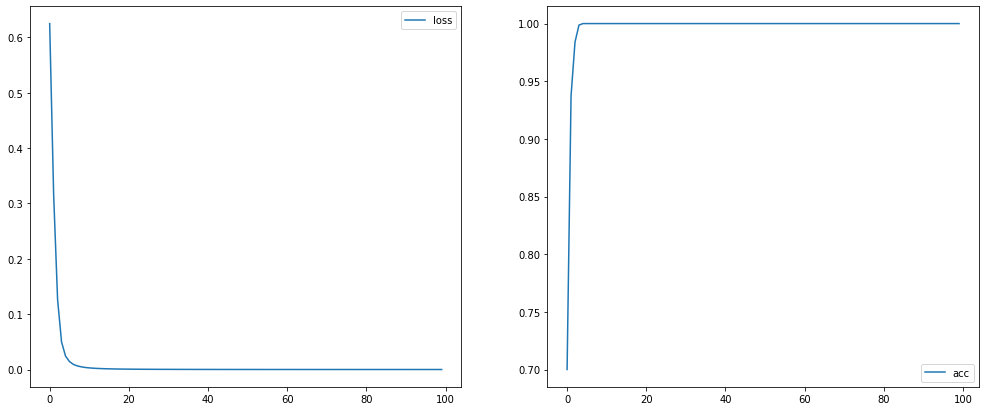

In [101]:
fig, axes = plt.subplots(1,2,figsize=(17,7))
ax = axes.ravel()

ax[0].plot(history.history['loss'],label='loss')
ax[0].legend(loc='best')

ax[1].plot(history.history['acc'], label='acc')
ax[1].legend(loc='best')

In [102]:
y_pred = model.predict_classes(x_test)
y_pred

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
    

In [103]:
score = model.evaluate(x_test,y_test)
score

250/250 [==============================] - 0s 124us/step


[0.8017004413604736, 0.8480000014305115]

In [104]:
name = model.metrics_names
name

['loss', 'acc']

In [105]:
print(f'{name[0]}:{score[0]}\n{name[1]}:{score[1]}')

loss:0.8017004413604736
acc:0.8480000014305115


# Embedding Layer

In [106]:
from keras.layers import Embedding

In [107]:
text = [[0,1,2,3,4],
        [5,1,2,3,6]]

### input_dim : input_dimension, 전체 단어의 개수
### output_dim : output_dimension, 자기가 원하는 아웃풋 형태
### input_length, 입력매트릭스 x축의 길이, 즉 입력변수의 개수

In [108]:
Embedding(7, # input_dim : input_dimension, 전체 단어의 개수
          2, # output_dim : output_dimension, 자기가 원하는 아웃풋 형태
          input_length=5) # input_length, 입력매트릭스 x축의 길이, 즉 입력변수의 개수

In [109]:
from keras.preprocessing.text import Tokenizer

In [110]:
t = Tokenizer()
text = 'the earth is an awesome place to live'
t.fit_on_texts([text])
t.word_index

{'the': 1,
 'earth': 2,
 'is': 3,
 'an': 4,
 'awesome': 5,
 'place': 6,
 'to': 7,
 'live': 8}

In [111]:
t.texts_to_sequences([text])

[[1, 2, 3, 4, 5, 6, 7, 8]]

In [112]:
test='the earth is an great place to live'
t.texts_to_sequences([test])

[[1, 2, 3, 4, 6, 7, 8]]

In [113]:
from keras.preprocessing.text import one_hot

## 텍스트가 하나일때 사용

In [115]:
one_hot(text, 5000)

[2789, 2280, 3656, 916, 2092, 1674, 685, 302]

## 데이터프레임에서 한 컬럼을 가져올때 사용

In [114]:
encoded_text = []
for t in text:
    encoded_text.append(one_hot(t, 5000))
encoded_text    

[[1913],
 [1617],
 [2207],
 [],
 [2207],
 [231],
 [426],
 [1913],
 [1617],
 [],
 [1431],
 [186],
 [],
 [231],
 [3649],
 [],
 [231],
 [1104],
 [2207],
 [186],
 [2197],
 [3960],
 [2207],
 [],
 [2154],
 [445],
 [231],
 [3395],
 [2207],
 [],
 [1913],
 [2197],
 [],
 [445],
 [1431],
 [1491],
 [2207]]

# 한줄로 쓸때

In [116]:
et = [one_hot(t,5000) for t in text]
et

[[1913],
 [1617],
 [2207],
 [],
 [2207],
 [231],
 [426],
 [1913],
 [1617],
 [],
 [1431],
 [186],
 [],
 [231],
 [3649],
 [],
 [231],
 [1104],
 [2207],
 [186],
 [2197],
 [3960],
 [2207],
 [],
 [2154],
 [445],
 [231],
 [3395],
 [2207],
 [],
 [1913],
 [2197],
 [],
 [445],
 [1431],
 [1491],
 [2207]]

# padding

In [117]:
from keras.preprocessing.sequence import pad_sequences

In [118]:
pad_sequences([[1,2,3],
               [3,4,5,6],
               [7,8]],
              maxlen=3,
              padding='post')

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 0]])

# Train Example

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### read train.tsv 훈련데이터 읽기

In [120]:
train = pd.read_csv('../data/train.tsv',sep='\t')
train

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


# Count phrase by sentiments and draw bar chart
# 감정에 따른 표현을 카운트, 막대그래프 그리기

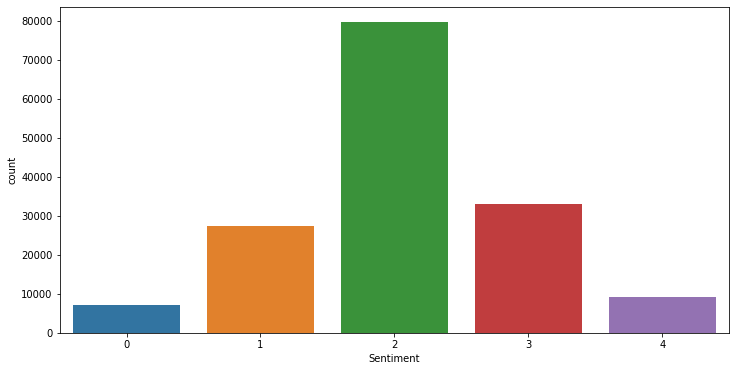

In [133]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot(train['Sentiment'])

# X and y split (x-Phrase, y-Sentiment, use only 5000 data!)

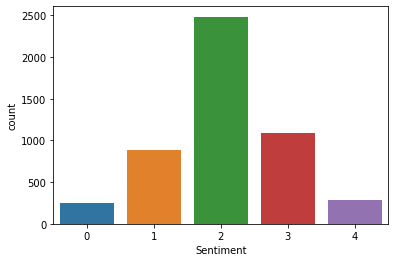

In [205]:
from sklearn.model_selection import train_test_split
import random

random_index = random.sample(range(0,156060),5000)

x = train.loc[random_index,'Phrase']
y = train.loc[random_index,'Sentiment']

sns.countplot(y)

# Data preprocessing

In [206]:
from keras.preprocessing.text import one_hot

In [207]:
encoded_phrase = [one_hot(i,5000) for i in x]
encoded_phrase

[[461, 348],
 [2582, 3139, 4299],
 [4223, 1866, 197, 3092, 2873, 3218],
 [4713],
 [2148, 3661, 2417, 2612, 685, 1149, 2390, 4136, 4055, 1141, 2344],
 [2390, 4136, 4080],
 [2494, 3016, 2822, 2112],
 [4782, 3998, 881, 4207, 1999, 3092, 4806, 900, 4712, 1840],
 [231, 3256, 685, 3256, 1330],
 [695,
  1214,
  695,
  2494,
  2148,
  623,
  1893,
  1207,
  1262,
  3639,
  619,
  4080,
  3078,
  4255,
  2789,
  1340,
  2696,
  2891,
  2017,
  1166,
  2065,
  2569,
  919,
  899,
  685,
  4366,
  3209,
  2822,
  1709,
  2738,
  2246],
 [729],
 [3598, 37, 2082],
 [2643,
  35,
  1098,
  4588,
  2696,
  1787,
  2789,
  2992,
  2822,
  265,
  3120,
  3092,
  3304,
  4085],
 [2878, 862, 4588, 2822, 2789, 1679, 1262, 1555],
 [2804, 1230, 2748, 2425, 4930, 3817],
 [1571,
  3253,
  3464,
  3443,
  3092,
  1774,
  766,
  2789,
  4243,
  2822,
  3776,
  2097,
  1801,
  428],
 [231, 2141, 685, 2450, 1258],
 [231, 2672, 1587, 4337, 2013, 2472, 1513, 2264, 1795],
 [224, 3998, 3938, 2994, 3646, 2648, 4003, 18

# Padding

In [208]:
from keras.preprocessing.sequence import pad_sequences

In [215]:
padd_phrase = pad_sequences(encoded_phrase, 
                            maxlen=400,
                            padding='post')
padd_phrase

array([[ 461,  348,    0, ...,    0,    0,    0],
       [2582, 3139, 4299, ...,    0,    0,    0],
       [4223, 1866,  197, ...,    0,    0,    0],
       ...,
       [ 164,    0,    0, ...,    0,    0,    0],
       [3656, 3865, 1612, ...,    0,    0,    0],
       [2349, 4679,    0, ...,    0,    0,    0]])

# Model building(Embedding 50 output vectors, 1 Flatten, 5 Dense with softmax)

In [216]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Embedding

In [219]:
model = Sequential()
model.add(Embedding(5000,
                    50,
                    input_length = 400))
model.add(Flatten())
model.add(Dense(5, # 출력 범주가 0~ 4 까지이므로 총 5개라 5를 준다.
                activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(padd_phrase,
                    y,
                    epochs=50,
                    validation_split=.2)

Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 2s 383us/step - loss: 1.2959 - acc: 0.4993 - val_loss: 1.2995 - val_acc: 0.4860
Epoch 2/50
4000/4000 [==============================] - 1s 159us/step - loss: 1.2104 - acc: 0.5217 - val_loss: 1.2639 - val_acc: 0.5080
Epoch 3/50
4000/4000 [==============================] - 1s 153us/step - loss: 1.0745 - acc: 0.6050 - val_loss: 1.2675 - val_acc: 0.5080
Epoch 4/50
4000/4000 [==============================] - 1s 151us/step - loss: 0.8957 - acc: 0.6910 - val_loss: 1.2705 - val_acc: 0.4970
Epoch 5/50
4000/4000 [==============================] - 1s 157us/step - loss: 0.7065 - acc: 0.7775 - val_loss: 1.3092 - val_acc: 0.4890
Epoch 6/50
4000/4000 [==============================] - 1s 152us/step - loss: 0.5370 - acc: 0.8425 - val_loss: 1.3480 - val_acc: 0.4910
Epoch 7/50
4000/4000 [==============================] - 1s 147us/step - loss: 0.4089 - acc: 0.8915 - val_loss: 1.4071 - val_acc: 0.4920


In [220]:
model.evaluate(padd_phrase,
               y)

5000/5000 [==============================] - 0s 43us/step


[0.6391240112550557, 0.8872]

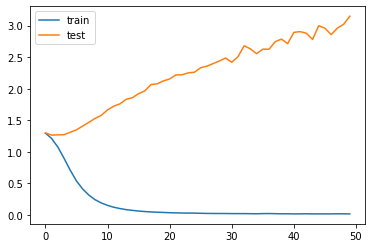

In [223]:
plt.plot(history.history['loss'], label='train') 
plt.plot(history.history['val_loss'], label='test')
plt.legend(loc='best')